我们来挑战一个非常经典且比TSP和CVRP更复杂的组合优化问题——**二次分配问题 (Quadratic Assignment Problem, QAP)**，并使用蚁群算法来求解。

### 一、复杂样例：二次分配问题 (QAP)

**问题描述：**
想象一下，你有 N 个**设施** (Facilities)，比如工厂里的部门、机场的登机口、或者电脑芯片上的模块。同时，你也有 N 个**位置** (Locations) 来安放这些设施。

现在，我们已知两个关键信息：
1.  **流量矩阵 (Flow Matrix)** `F`：矩阵中 `F(i, j)` 表示设施 `i` 和设施 `j` 之间需要往来的**物流量**或**信息交互量**。流量越大，表示它们关系越密切，应该放得越近。
2.  **距离矩阵 (Distance Matrix)** `D`：矩阵中 `D(k, l)` 表示位置 `k` 和位置 `l` 之间的**距离**。

**目标：**
找到一个**分配方案 (Assignment)**，即哪个设施 `i` 应该被放置在哪个位置 `k`，使得**总成本 (Total Cost)** 最小。

**总成本如何计算？**
总成本是所有设施对之间**流量**与它们所在位置之间**距离**的**乘积之和**。

`Cost = Σ_i Σ_j F(i, j) * D(p(i), p(j))`

其中，`p(i)` 是设施 `i` 被分配到的位置。

**为什么QAP非常复杂？**
*   **非线性目标函数**：成本的计算是二次的（流量乘以距离），这比TSP或CVRP中简单的距离求和要复杂得多。一个设施的位置变动，会影响到它与其他所有 `N-1` 个设施的成本计算，牵一发而动全身。
*   **组合爆炸**：N 个设施分配到 N 个位置，总共有 `N!` 种可能的分配方案。对于 N=20，`20!` 是一个天文数字，穷举搜索完全不可行。
*   **崎岖的解空间**：QAP的解空间非常崎岖，充满了大量的局部最优解，是NP-hard问题中最难的一类。

### 二、蚁群算法如何解决 QAP？

我们将QAP问题看作是一个**顺序决策过程**，这正是蚁群算法的强项。

1.  **解的构建**：一只蚂蚁的任务是构建一个完整的分配方案。我们可以想象蚂蚁依次为 N 个位置“选择”要安放的设施。
    *   蚂蚁站在位置1，决定放哪个设施。
    *   然后走到位置2，从剩下的设施中决定放哪个。
    *   ...直到所有位置都被分配了一个设施。

2.  **信息素 (Pheromone)** `τ`：
    *   信息素不再是定义在城市之间的路径上，而是定义在**“设施-位置”的配对**上。
    *   我们创建一个 N x N 的信息素矩阵 `τ`，其中 `τ(i, k)` 表示**将设施 `i` 放置在位置 `k` 这个决策的“受欢迎程度”**。信息素浓度越高，说明这个配对在过去的好方案中出现得越多。

3.  **启发式信息 (Heuristic Information)** `η`：
    *   这是QAP应用ACO的难点和关键。当蚂蚁在为位置 `k` 选择设施 `i` 时，一个好的启发式信息应该能**预估**这个决策的好坏。
    *   一个简单但有效的启发式信息是：**设施 `i` 与已分配设施的“交互潜力”**。
        *   假设我们已经为位置 `l` 分配了设施 `j`。那么将设施 `i` 放在位置 `k` 的潜在成本贡献是 `F(i, j) * D(k, l)`。
        *   我们可以计算设施 `i` 与所有**已分配**设施的潜在成本之和，作为启发式信息。但这个计算比较复杂。
        *   一个更简化的方法是：预先计算每个设施的总流量 `Σ_j F(i, j)` 和每个位置的总距离 `Σ_l D(k, l)`。启发式信息 `η(i, k)` 可以是 `1 / (Σ_j F(i, j) * Σ_l D(k, l))` 的某种形式，即**总流量大的设施倾向于被放在总距离小的“中心”位置**。

4.  **路径选择规则**：当蚂蚁在为位置 `k` 做决策时，它选择设施 `i` (假设 `i` 未被分配) 的概率 `P(i, k)` 正比于：
    `P(i, k) ∝ [τ(i, k)]^α * [η(i, k)]^β`

5.  **信息素更新**：
    *   所有蚂蚁完成分配后，计算每个方案的总成本。
    *   表现最好的蚂蚁（成本最低的方案）会在它们所做的决策上留下更多的信息素。
    *   例如，如果最优方案是将设施 `i` 放在了位置 `k`，那么 `τ(i, k)` 就会得到加强。


Generation 1, Best Cost: 444055.00
Generation 2, Best Cost: 444055.00
Generation 3, Best Cost: 442497.00
Generation 4, Best Cost: 442497.00
Generation 5, Best Cost: 441052.00
Generation 6, Best Cost: 441052.00
Generation 7, Best Cost: 440741.00
Generation 8, Best Cost: 440741.00
Generation 9, Best Cost: 440741.00
Generation 10, Best Cost: 440741.00
Generation 11, Best Cost: 440741.00
Generation 12, Best Cost: 440741.00
Generation 13, Best Cost: 440741.00
Generation 14, Best Cost: 440741.00
Generation 15, Best Cost: 440595.00
Generation 16, Best Cost: 439134.00
Generation 17, Best Cost: 439134.00
Generation 18, Best Cost: 438955.00
Generation 19, Best Cost: 438955.00
Generation 20, Best Cost: 435673.00
Generation 21, Best Cost: 434082.00
Generation 22, Best Cost: 434082.00
Generation 23, Best Cost: 434078.00
Generation 24, Best Cost: 433327.00
Generation 25, Best Cost: 433327.00
Generation 26, Best Cost: 433327.00
Generation 27, Best Cost: 433327.00
Generation 28, Best Cost: 433327.00
G

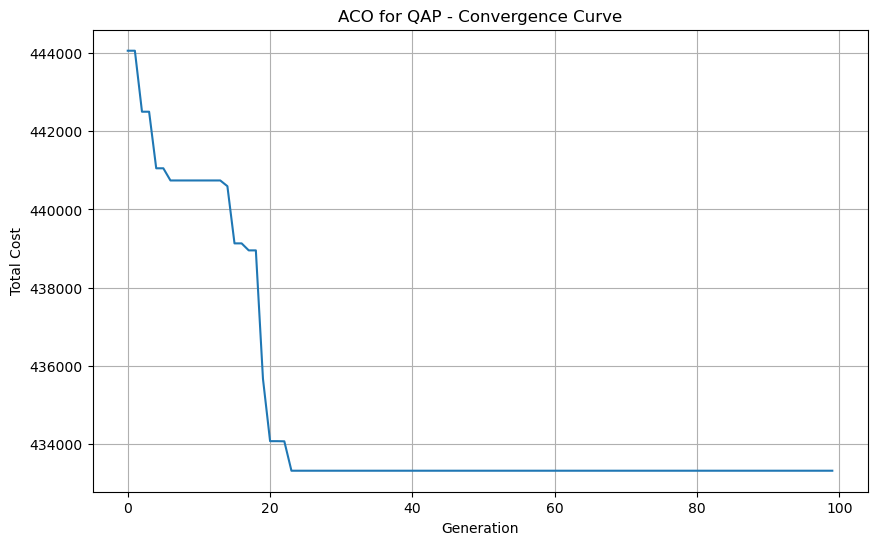


--- Final Solution ---
Lowest cost found: 433327.00
Facility -> Location Assignment:
{0: np.int64(12), 1: np.int64(1), 2: np.int64(8), 3: np.int64(6), 4: np.int64(14), 5: np.int64(19), 6: np.int64(10), 7: np.int64(11), 8: np.int64(4), 9: np.int64(2), 10: np.int64(5), 11: np.int64(0), 12: np.int64(3), 13: np.int64(18), 14: np.int64(7), 15: np.int64(16), 16: np.int64(9), 17: np.int64(17), 18: np.int64(15), 19: np.int64(13)}


In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# --- 1. QAP 问题定义 ---
N = 20  # 设施/位置的数量

# 随机生成对称的流量矩阵F和距离矩阵D
np.random.seed(42)
F = np.random.randint(0, 100, size=(N, N))
F = (F + F.T) // 2 # 对称化
np.fill_diagonal(F, 0)

D = np.random.randint(0, 100, size=(N, N))
D = (D + D.T) // 2
np.fill_diagonal(D, 0)

# --- 2. ACO 超参数 ---
NUM_ANTS = 30
MAX_GEN = 100
ALPHA = 1.0       # 信息素重要性因子
BETA = 3.0        # 启发式信息重要性因子
RHO = 0.5         # 信息素挥发系数
Q = 100           # 信息素强度常数

# --- 3. 核心函数 ---
def calculate_cost(assignment, F, D):
    """计算给定分配方案的总成本"""
    cost = 0
    for i in range(N):
        for j in range(i + 1, N):
            pos_i = assignment[i]
            pos_j = assignment[j]
            cost += F[i, j] * D[pos_i, pos_j]
    return cost

def create_heuristic_matrix(F, D):
    """创建一个简化的启发式信息矩阵"""
    # 启发式思想：总流量大的设施应放在总距离小的“中心”位置
    flow_potential = np.sum(F, axis=1)
    dist_potential = np.sum(D, axis=1)
    
    heuristic = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            # 防止除以零
            if flow_potential[i] * dist_potential[j] == 0:
                heuristic[i, j] = 1.0 
            else:
                # 成本潜力越小越好，所以取倒数
                heuristic[i, j] = 1.0 / (flow_potential[i] * dist_potential[j])
    return heuristic

# --- 4. 蚁群算法主程序 ---
def aco_qap(F, D):
    # 初始化信息素矩阵
    pheromones = np.ones((N, N))
    
    # 创建启发式矩阵
    heuristic = create_heuristic_matrix(F, D)
    
    best_assignment = None
    best_cost = float('inf')
    cost_history = []

    for gen in range(MAX_GEN):
        all_assignments = []
        all_costs = []
        
        for ant in range(NUM_ANTS):
            assignment = -np.ones(N, dtype=int) # -1 表示设施未被分配
            unassigned_facilities = list(range(N))
            
            # 依次为每个位置分配一个设施
            for loc in range(N):
                # 计算所有未分配设施的概率
                probs = []
                for fac in unassigned_facilities:
                    tau = pheromones[fac, loc] ** ALPHA
                    eta = heuristic[fac, loc] ** BETA
                    probs.append(tau * eta)
                
                # 归一化概率
                probs_sum = sum(probs)
                if probs_sum == 0: # 如果概率和为0，则随机选一个
                    chosen_fac = random.choice(unassigned_facilities)
                else:
                    probs = [p / probs_sum for p in probs]
                    # 轮盘赌选择
                    chosen_fac = np.random.choice(unassigned_facilities, p=probs)
                
                # 分配设施并更新列表
                assignment[chosen_fac] = loc
                unassigned_facilities.remove(chosen_fac)

            cost = calculate_cost(assignment, F, D)
            all_assignments.append(assignment)
            all_costs.append(cost)
            
            # 更新全局最优解
            if cost < best_cost:
                best_cost = cost
                best_assignment = assignment
        
        # 信息素更新
        # 1. 挥发
        pheromones *= (1 - RHO)
        
        # 2. 增强 (这里我们用精英策略，只让最好的蚂蚁增强)
        # 找到本代最优的蚂蚁
        min_cost_idx = np.argmin(all_costs)
        best_ant_assignment = all_assignments[min_cost_idx]
        best_ant_cost = all_costs[min_cost_idx]
        
        delta_pheromone = Q / best_ant_cost
        for fac in range(N):
            loc = best_ant_assignment[fac]
            pheromones[fac, loc] += delta_pheromone
            
        cost_history.append(best_cost)
        print(f"Generation {gen+1}, Best Cost: {best_cost:.2f}")
        
    return best_assignment, best_cost, cost_history

# --- 5. 运行与可视化 ---
best_assignment, best_cost, cost_history = aco_qap(F, D)

# 可视化成本收敛曲线
plt.figure(figsize=(10, 6))
plt.plot(cost_history)
plt.title('ACO for QAP - Convergence Curve')
plt.xlabel('Generation')
plt.ylabel('Total Cost')
plt.grid(True)
plt.show()

print("\n--- Final Solution ---")
print(f"Lowest cost found: {best_cost:.2f}")
print("Facility -> Location Assignment:")
# 将 assignment 数组转换成 Facility -> Location 的映射
final_map = {facility: location for facility, location in enumerate(best_assignment)}
print(final_map)

我们来逐个函数、逐个逻辑块地详细解读这段用蚁群算法（ACO）解决二次分配问题（QAP）的Python代码。

---

### 1. `calculate_cost(assignment, F, D)`

这个函数是**评估器**或**目标函数**。它的唯一职责是：给定一个完整的分配方案，计算出这个方案的总成本是多少。

*   **输入参数**:
    *   `assignment`: 这是一个长度为 `N` 的一维NumPy数组，是QAP问题的一个完整解。它的**索引**代表**设施编号**，**值**代表**位置编号**。例如，`assignment[i] = k` 的意思是“将设施 `i` 放置在位置 `k`”。
    *   `F`: 流量矩阵。`F[i, j]` 是设施 `i` 和设施 `j` 之间的物流量。
    *   `D`: 距离矩阵。`D[k, l]` 是位置 `k` 和位置 `l` 之间的距离。

*   **内部逻辑**:
    ```python
    cost = 0
    # 遍历所有不重复的设施对 (i, j)
    for i in range(N):
        for j in range(i + 1, N):
            # 找到设施i和设施j被分配到的位置
            pos_i = assignment[i]
            pos_j = assignment[j]
            # 核心公式：成本 += 流量 * 距离
            cost += F[i, j] * D[pos_i, pos_j]
    ```
    *   `for i in range(N): for j in range(i + 1, N):` 这个双重循环非常高效。它遍历了所有可能的**设施对**，例如 `(0, 1), (0, 2), ..., (0, N-1), (1, 2), ..., (N-2, N-1)`，确保每对只计算一次，并且避免了设施与自身的计算。
    *   `pos_i = assignment[i]` 和 `pos_j = assignment[j]`：这是从解决方案 `assignment` 中查找设施 `i` 和 `j` 到底被放在了哪个位置。
    *   `cost += F[i, j] * D[pos_i, pos_j]`：这是QAP成本计算的**核心**。它取出两个设施间的流量，乘以它们所在位置间的距离，然后累加到总成本 `cost` 上。

*   **输出**:
    *   返回一个浮点数 `cost`，代表该 `assignment` 方案的总成本。这个值越小，方案越好。

---

### 2. `create_heuristic_matrix(F, D)`

这个函数负责创建**启发式信息矩阵 (`η`)**。启发式信息是给蚂蚁的“本地提示”或“贪心指引”，告诉它在没有任何信息素的情况下，哪些选择**看起来**更优。

*   **输入参数**:
    *   `F` 和 `D`：问题的定义矩阵。

*   **核心思想**:
    一个好的分配方案倾向于**将交互频繁（总流量大）的设施，放置在交通便利（总距离小）的“中心”位置**。这个函数就是要把这个思想量化。

*   **内部逻辑**:
    ```python
    # 计算每个设施的“流量潜力”（总流量）
    flow_potential = np.sum(F, axis=1)
    # 计算每个位置的“距离潜力”（总距离）
    dist_potential = np.sum(D, axis=1)
    
    heuristic = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            # ...
            # 成本潜力越小越好，所以取倒数
            heuristic[i, j] = 1.0 / (flow_potential[i] * dist_potential[j])
    ```
    *   `flow_potential`: 这是一个长度为 `N` 的数组，`flow_potential[i]` 是设施 `i` 与所有其他设施的流量总和。值越大，说明设施 `i` 越“繁忙”。
    *   `dist_potential`: 这是一个长度为 `N` 的数组，`dist_potential[j]` 是位置 `j` 到所有其他位置的距离总和。值越小，说明位置 `j` 越“中心”。
    *   `heuristic[i, j] = 1.0 / (flow_potential[i] * dist_potential[j])`:
        *   分母 `flow_potential[i] * dist_potential[j]` 可以理解为将繁忙设施 `i` 放在位置 `j` 的“潜在成本”。
        *   如果设施 `i` 很繁忙（`flow_potential[i]` 大）且位置 `j` 很偏远（`dist_potential[j]` 大），则分母很大，倒数（启发值 `heuristic[i, j]`）就很小，意味着这个选择**吸引力低**。
        *   反之，如果设施 `i` 很繁忙，而位置 `j` 很中心，则分母相对较小，启发值就大，意味着这个选择**吸引力高**。
    *   `if ... else ...`: 这是一个健壮性检查，防止分母为零导致程序崩溃。

*   **输出**:
    *   返回一个 `N x N` 的矩阵 `heuristic`，其中 `heuristic[i, j]` 代表了将设施 `i` 放置在位置 `j` 的启发式吸引力大小。

---

### 3. `aco_qap(F, D)`

这是**算法的主体**，整合了所有逻辑，驱动整个蚁群进行搜索和优化。

*   **阶段一：初始化**
    ```python
    pheromones = np.ones((N, N))
    heuristic = create_heuristic_matrix(F, D)
    best_assignment = None
    best_cost = float('inf')
    cost_history = []
    ```
    *   `pheromones`: 初始化信息素矩阵。所有元素设为1，保证在开始时，每个“设施-位置”配对都有被选择的机会。
    *   `heuristic`: 调用前面的函数生成启发式矩阵。
    *   `best...`: 初始化用于记录全局最优解和成本历史的变量。

*   **阶段二：主循环 (迭代)**
    ```python
    for gen in range(MAX_GEN):
        # ... 蚂蚁构建解 ...
        # ... 信息素更新 ...
    ```
    这个循环代表了一代又一代的进化过程。

*   **阶段二(A)：蚂蚁构建解**
    ```python
    for ant in range(NUM_ANTS):
        # ...
        for loc in range(N):
            # ...
    ```
    *   外层循环遍历每一只蚂蚁。
    *   内层循环 `for loc in range(N)` 是**解的构建过程**。这只蚂蚁会依次访问位置 `0, 1, 2, ...`，并为每个位置决定安放哪个还未被分配的设施。
    *   **决策过程**:
        ```python
        probs = []
        for fac in unassigned_facilities:
            tau = pheromones[fac, loc] ** ALPHA
            eta = heuristic[fac, loc] ** BETA
            probs.append(tau * eta)
        ```
        这是**路径选择规则**的实现。对于当前位置 `loc`，蚂蚁会考察所有尚未分配的设施 `fac`。它计算每个 `(fac, loc)` 配对的吸引力，这个吸引力是**信息素 (`tau`)** 和**启发式信息 (`eta`)** 的加权乘积。
    *   **轮盘赌选择**:
        ```python
        probs = [p / sum(probs) for p in probs]
        chosen_fac = np.random.choice(unassigned_facilities, p=probs)
        ```
        将所有候选设施的吸引力分数转换成概率分布，然后进行一次**带权重的随机抽样**。吸引力越高的设施，被选中的概率越大。这体现了ACO的随机搜索特性。
    *   **构建与评估**: 蚂蚁完成一整套分配后 (`assignment` 数组被填满)，立即调用 `calculate_cost` 评估其好坏，并与全局最优解 `best_cost` 比较和更新。

*   **阶段二(B)：信息素更新**
    这在所有蚂蚁都构建完解之后进行，是**集体智慧形成的关键**。
    ```python
    # 1. 挥发
    pheromones *= (1 - RHO)
    
    # 2. 增强
    min_cost_idx = np.argmin(all_costs)
    best_ant_assignment = all_assignments[min_cost_idx]
    best_ant_cost = all_costs[min_cost_idx]
    
    delta_pheromone = Q / best_ant_cost
    for fac in range(N):
        loc = best_ant_assignment[fac]
        pheromones[fac, loc] += delta_pheromone
    ```
    *   **挥发**: `pheromones *= (1 - RHO)`。所有路径上的信息素都会按比例减少。这有助于“遗忘”不好的路径，避免算法过早停滞在局部最优解。
    *   **增强**:
        *   首先，找到本代蚂蚁中表现最好（成本最低）的那一只。这是一种**精英策略 (Elitist Strategy)**，确保了最优解的信息会被强化。
        *   `delta_pheromone = Q / best_ant_cost`: 计算要增加的信息素量。方案的成本越低，增加的信息素就越多，这是一个**正反馈**。
        *   `pheromones[fac, loc] += delta_pheromone`: 遍历本代最优方案中的每一个“设施-位置”配对，并在信息素矩阵的对应位置上增加信息素。这使得构成好方案的“组件”在下一代中更有可能被其他蚂蚁选中。

*   **输出**:
    *   返回找到的全局最优分配方案 `best_assignment`、其成本 `best_cost` 以及记录了每一代最优成本的 `cost_history`。